In [64]:
# dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager

In [3]:
# import data
olympic_data_df = pd.read_csv('08-05-2021_all_country_data.csv')
olympic_data_df.head()

,Country,Country Code,Gold,Silver,Bronze,Total,Year,Host_City,Host_Country,GDP,...,Distance From Barcelona 1992,Distance From Atlanta 1996,Distance From Sydney 2000,Distance From Athens 2004,Distance From Beijing 2008,Distance From London 2012,Distance From Rio de Janeiro 2016,Distance From Tokyo 2020,Population,Life Expectancy
0,Netherlands,NLD,2,4,4,10,1964,Tokyo,JPN,1.869938e+10,...,759.071169,5020.216004,9971.222180,1445.327934,6159.095349,257.703275,5802.288098,7464.868875,12127120.0,73.704146
1,Bulgaria,BGR,3,5,2,10,1964,Tokyo,JPN,NaN,...,1150.565063,5905.006345,8751.145986,336.329730,5081.741124,1410.485748,5785.377927,6375.306752,8144340.0,71.121220
2,Pakistan,PAK,0,1,0,1,1964,Tokyo,JPN,5.204956e+09,...,3911.822101,8598.987912,6303.435514,2725.646840,2391.214242,4181.826383,7442.963227,3637.034033,49627623.0,48.670000
3,Brazil,BRA,0,0,1,1,1964,Tokyo,JPN,2.121189e+10,...,4770.980821,3947.154167,10926.308280,5332.087331,9713.367679,5290.562660,566.330518,10813.306870,81064572.0,56.121000
4,Italy,ITA,10,10,7,27,1964,Tokyo,JPN,6.317542e+10,...,552.648926,5306.023586,9198.202937,668.293462,5675.147349,955.548316,5380.124554,6965.601489,51675350.0,70.311707


In [4]:
# get some summary stats
olympic_data_df.describe()

,Gold,Silver,Bronze,Total,Year,GDP,Distance From Tokyo 1964,Distance From Mexico City 1968,Distance From Munich 1972,Distance From Montreal 1976,...,Distance From Barcelona 1992,Distance From Atlanta 1996,Distance From Sydney 2000,Distance From Athens 2004,Distance From Beijing 2008,Distance From London 2012,Distance From Rio de Janeiro 2016,Distance From Tokyo 2020,Population,Life Expectancy
count,865.000000,865.000000,865.000000,865.000000,865.000000,7.700000e+02,799.000000,799.000000,799.000000,799.000000,...,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,8.420000e+02,841.000000
mean,3.981503,3.964162,4.424277,12.369942,1994.524855,4.844422e+11,7036.879628,6742.089081,2992.145323,5741.838662,...,3086.187402,6020.121419,8846.072675,2977.154142,5963.421211,3237.631207,5821.577064,7036.879628,5.860873e+07,70.724150
std,8.542764,6.999329,6.836152,21.619972,15.735874,1.499805e+12,2980.901525,3199.958761,2629.775785,2915.594274,...,2455.328772,3052.686920,2873.649371,2383.364474,2785.410187,2615.883112,2204.148173,2980.901525,1.671631e+08,8.440854
min,0.000000,0.000000,0.000000,1.000000,1964.000000,2.221006e+08,0.000000,0.000000,195.310258,17.858695,...,316.773650,585.308783,149.534966,0.000000,0.000000,0.000000,566.330518,0.000000,5.320000e+04,36.203000
25%,0.000000,0.000000,1.000000,2.000000,1984.000000,2.002120e+10,5749.743872,5704.149817,746.104518,4369.683402,...,1007.554190,4836.118307,7254.599739,1158.608736,4740.553289,1020.472164,4667.373745,5749.743872,5.595500e+06,68.251463
50%,1.000000,1.000000,2.000000,4.000000,1996.000000,8.309884e+10,6835.886355,6648.953818,2143.280101,5197.250774,...,2249.106833,5628.709012,9253.710860,1747.712618,5615.044697,2543.617705,5802.288098,6835.886355,1.519597e+07,72.410000
75%,4.000000,4.000000,5.000000,13.000000,2008.000000,3.129255e+11,7703.968961,7598.502930,5156.713371,6838.891234,...,4588.574072,7025.597520,10030.827830,5332.087331,6533.068547,4849.277754,6577.588157,7703.968961,5.108560e+07,76.124390
max,83.000000,69.000000,46.000000,195.000000,2016.000000,1.874510e+13,17567.722420,15503.567800,11202.501520,14901.591980,...,10995.367040,15046.355970,17778.314740,11516.532810,16388.241500,11467.580870,12096.891790,17567.722420,1.378665e+09,83.984878


In [5]:
# NOTE: What other data cleaning needs to be done?
# distance values should be reversed if the ML model counts higher values as better
# Year probably remove
# Make sure to scale all of the data
# could add number of unique events won
# could add number of medals won by women and men
# look at scaling the medals +3 +2 +1 and see how that defines the better countries

In [6]:
# downsclale GDP
scaling_test_df = olympic_data_df.copy()
scaling_test_df['GDP'] = scaling_test_df['GDP'] / 1000000000 #billion
scaling_test_df.head()

,Country,Country Code,Gold,Silver,Bronze,Total,Year,Host_City,Host_Country,GDP,...,Distance From Barcelona 1992,Distance From Atlanta 1996,Distance From Sydney 2000,Distance From Athens 2004,Distance From Beijing 2008,Distance From London 2012,Distance From Rio de Janeiro 2016,Distance From Tokyo 2020,Population,Life Expectancy
0,Netherlands,NLD,2,4,4,10,1964,Tokyo,JPN,18.699381,...,759.071169,5020.216004,9971.222180,1445.327934,6159.095349,257.703275,5802.288098,7464.868875,12127120.0,73.704146
1,Bulgaria,BGR,3,5,2,10,1964,Tokyo,JPN,NaN,...,1150.565063,5905.006345,8751.145986,336.329730,5081.741124,1410.485748,5785.377927,6375.306752,8144340.0,71.121220
2,Pakistan,PAK,0,1,0,1,1964,Tokyo,JPN,5.204956,...,3911.822101,8598.987912,6303.435514,2725.646840,2391.214242,4181.826383,7442.963227,3637.034033,49627623.0,48.670000
3,Brazil,BRA,0,0,1,1,1964,Tokyo,JPN,21.211892,...,4770.980821,3947.154167,10926.308280,5332.087331,9713.367679,5290.562660,566.330518,10813.306870,81064572.0,56.121000
4,Italy,ITA,10,10,7,27,1964,Tokyo,JPN,63.175417,...,552.648926,5306.023586,9198.202937,668.293462,5675.147349,955.548316,5380.124554,6965.601489,51675350.0,70.311707


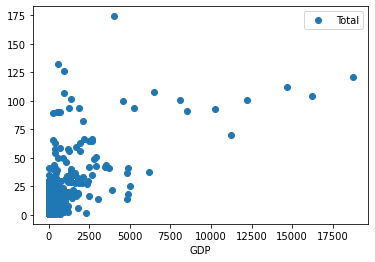

In [7]:
# graph some data and see if you can find linear patterns if not we might have to use random forest

scaling_test_df.plot(x='GDP', y='Total', style='o')
plt.show()

In [8]:
# with plotly
fig =  px.scatter(scaling_test_df, x='GDP', y='Total', trendline='ols', trendline_color_override='red')
fig.show()
# need to bin high GDP 

In [9]:
GDP_review = scaling_test_df[['Country','GDP']].sort_values('GDP',ascending=False)
GDP_review

# NOTE: Kind of forgot that we have every year in this analysis so any of these charts are going to look weird - take averages?

,Country,GDP
858,United States,18745.1
765,United States,16197.0
662,United States,14712.8
600,United States,12213.7
819,China,11233.3
...,...,...
775,Chinese Taipei,NaN
791,Individual Olympic Athletes,NaN
816,Chinese Taipei,NaN
827,North Korea,NaN


In [10]:
# with plotly
fig =  px.scatter(scaling_test_df, x='Population', y='Total', trendline='ols', trendline_color_override='red')
fig.show()
# need to bin

In [11]:
# with plotly
fig =  px.scatter(scaling_test_df, x='Life Expectancy', y='Total', trendline='ols', trendline_color_override='red')
fig.show()
# need to bin

In [12]:
fig = px.bar(scaling_test_df, x="Country", y=["Gold", "Silver", "Bronze"], title="Medals by Podium")
fig.show()

In [15]:
# create dataframe by indexing any row with a null value
missing_data_df = scaling_test_df[scaling_test_df.isnull().any(axis=1)]
missing_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 1 to 850
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            135 non-null    object 
 1   Country Code                       135 non-null    object 
 2   Gold                               135 non-null    int64  
 3   Silver                             135 non-null    int64  
 4   Bronze                             135 non-null    int64  
 5   Total                              135 non-null    int64  
 6   Year                               135 non-null    int64  
 7   Host_City                          135 non-null    object 
 8   Host_Country                       135 non-null    object 
 9   GDP                                40 non-null     float64
 10  Latitude Hemisphere                69 non-null     object 
 11  Longitude Hemisphere               69 non-null     object 

In [18]:
# drop NaN rows from the dataset for testing. 
scaling_drops = scaling_test_df[scaling_test_df['GDP'].notna()]
scaling_drops.info() # hidden with 'o'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770 entries, 0 to 864
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            770 non-null    object 
 1   Country Code                       770 non-null    object 
 2   Gold                               770 non-null    int64  
 3   Silver                             770 non-null    int64  
 4   Bronze                             770 non-null    int64  
 5   Total                              770 non-null    int64  
 6   Year                               770 non-null    int64  
 7   Host_City                          770 non-null    object 
 8   Host_Country                       770 non-null    object 
 9   GDP                                770 non-null    float64
 10  Latitude Hemisphere                730 non-null    object 
 11  Longitude Hemisphere               730 non-null    object 

In [28]:
scaling_drops.describe()

,Gold,Silver,Bronze,Total,Year,GDP,Distance From Tokyo 1964,Distance From Mexico City 1968,Distance From Munich 1972,Distance From Montreal 1976,...,Distance From Barcelona 1992,Distance From Atlanta 1996,Distance From Sydney 2000,Distance From Athens 2004,Distance From Beijing 2008,Distance From London 2012,Distance From Rio de Janeiro 2016,Distance From Tokyo 2020,Population,Life Expectancy
count,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,7.700000e+02,769.000000
mean,3.801299,3.753247,4.241558,11.796104,1996.119481,484.442214,7130.576104,6688.003233,3081.522235,5718.739319,...,3147.853524,5982.727923,8866.456068,3064.465592,6062.968370,3303.701793,5771.897482,7130.576104,6.164410e+07,71.104035
std,7.978075,6.456125,6.581792,20.262676,15.127246,1499.804701,2997.594246,3248.250086,2650.987273,2963.503370,...,2482.826210,3098.960647,2949.467729,2404.945204,2804.134965,2648.900919,2232.315834,2997.594246,1.742061e+08,8.396600
min,0.000000,0.000000,0.000000,1.000000,1964.000000,0.222101,0.000000,0.000000,195.310258,17.858695,...,316.773650,585.308783,149.534966,0.000000,0.000000,0.000000,566.330518,0.000000,5.320000e+04,36.203000
25%,0.000000,0.000000,1.000000,2.000000,1984.000000,20.021199,5749.743872,5541.500086,794.068005,4339.752748,...,1007.554190,4762.576734,7254.599739,1167.056350,4749.510579,1020.472164,4600.328710,5749.743872,5.446504e+06,68.529000
50%,1.000000,1.000000,2.000000,4.000000,2000.000000,83.098835,6919.883139,6605.111663,2357.402831,5197.250774,...,2373.747692,5582.073320,9260.500138,1846.292898,5675.147349,2946.992593,5785.377927,6919.883139,1.518339e+07,72.933902
75%,3.000000,4.000000,5.000000,13.000000,2008.000000,312.925500,7819.620505,7598.502930,5239.568930,6841.549250,...,4588.574072,7040.666552,10074.420940,5332.087331,6575.494888,4892.460575,6577.588157,7819.620505,5.319614e+07,76.414000
max,83.000000,61.000000,46.000000,174.000000,2016.000000,18745.100000,17567.722420,15503.567800,11202.501520,14901.591980,...,10995.367040,15046.355970,17778.314740,11516.532810,16388.241500,11467.580870,12096.891790,17567.722420,1.378665e+09,83.984878


In [34]:
# create correlation matrix with pandas
corrMatrix = scaling_drops.corr()

In [35]:
# create column with average distance to the games to reduce factors
regression_df = scaling_drops.copy()

In [37]:
# get the distance columnns separated
distance_cols = regression_df.filter(regex='Distance')
# average the distances
distance_cols['Avg Distance to Games'] = distance_cols.mean(axis=1)

ipykernel_launcher:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Distance From Tokyo 1964,Distance From Mexico City 1968,Distance From Munich 1972,Distance From Montreal 1976,Distance From Moscow 1980,Distance From Los Angeles 1984,Distance From Seoul 1988,Distance From Barcelona 1992,Distance From Atlanta 1996,Distance From Sydney 2000,Distance From Athens 2004,Distance From Beijing 2008,Distance From London 2012,Distance From Rio de Janeiro 2016,Distance From Tokyo 2020,Avg Distance to Games
0,7464.868875,6100.454387,476.857991,4398.587044,1805.151258,6820.142453,6738.124602,759.071169,5020.216004,9971.222180,1445.327934,6159.095349,257.703275,5802.288098,7464.868875,4712.265300
2,3637.034033,9453.034885,3509.592327,8160.205178,2474.857350,10447.260270,2928.095499,3911.822101,8598.987912,6303.435514,2725.646840,2391.214242,4181.826383,7442.963227,3637.034033,5320.200653
3,10813.306870,3693.901245,5448.606277,4476.475126,6740.502771,5154.818360,10177.049310,4770.980821,3947.154167,10926.308280,5332.087331,9713.367679,5290.562660,566.330518,10813.306870,6524.317219
4,6965.601489,6274.195850,457.047003,4804.931403,1671.339599,7145.651673,6242.692758,552.648926,5306.023586,9198.202937,668.293462,5675.147349,955.548316,5380.124554,6965.601489,4550.870026
5,6835.886355,6965.445894,840.479844,5197.250774,1086.142946,7640.034601,6112.028674,1503.346409,5861.369457,9701.364560,1520.955875,5528.906607,1125.672413,6577.588157,6835.886355,4888.823928


In [45]:
# add the average distance to the regression df and drop the rest of the distance cols
regression_df['Average Distance to Games'] = distance_cols['Avg Distance to Games']
# get columns to drop
reg_dist_cols = [col for col in regression_df.columns if 'From' in col]
regression_df.drop(columns=reg_dist_cols, axis=1, inplace=True)

,Country,Country Code,Gold,Silver,Bronze,Total,Year,Host_City,Host_Country,GDP,Latitude Hemisphere,Longitude Hemisphere,Population,Life Expectancy,Predictions,Average Distance to Games
0,Netherlands,NLD,2,4,4,10,1964,Tokyo,JPN,18.699381,North,East,12127120.0,73.704146,7.688903,4712.265300
2,Pakistan,PAK,0,1,0,1,1964,Tokyo,JPN,5.204956,North,East,49627623.0,48.670000,10.315719,5320.200653
3,Brazil,BRA,0,0,1,1,1964,Tokyo,JPN,21.211892,South,West,81064572.0,56.121000,9.540485,6524.317219
4,Italy,ITA,10,10,7,27,1964,Tokyo,JPN,63.175417,North,East,51675350.0,70.311707,7.935792,4550.870026
5,Sweden,SWE,2,2,4,8,1964,Tokyo,JPN,22.532417,North,East,7661354.0,73.733171,16.857343,4888.823928


In [48]:
# drop predictions 
regression_df.drop(['Predictions'], 1, inplace=True)

In [60]:
stats_model_df = regression_df.dropna()

In [61]:
import statsmodels.api as sm
import numpy as np
# duncan_prestige = sm.datasets.get_rdataset("Duncan", "carData")
Y = stats_model_df['Total']
X = stats_model_df.drop(['Country Code','Total', 'Country', 'Host_City', 'Host_Country', 'Latitude Hemisphere', 'Longitude Hemisphere'], axis=1)
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

const                        2.191433e-07
Gold                         1.000000e+00
Silver                       1.000000e+00
Bronze                       1.000000e+00
Year                        -9.302749e-11
GDP                          2.708696e-13
Population                   1.027078e-16
Life Expectancy              3.506310e-16
Average Distance to Games   -2.751841e-17
dtype: float64

In [63]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.429e+19
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:58:09   Log-Likelihood:                 11403.
No. Observations:                 730   AIC:                        -2.279e+04
Df Residuals:                     721   BIC:                        -2.275e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2.191e-07   2.13e-07      1.030      0.303   -1.99e-07    6.37e-07
Gold                          1.0000   4.89e-10   2.04e+09      0.000       1.000       1.000
Silver                        1.0000   6.36e-10   1.57e+09      0.000       1.000       1.000
Bronze                        1.0000   5.17e-10   1.94e+09      0.000       1.000       1.000
Year                      -9.303e-11   1.09e-10     -0.856      0.392   -3.06e-10     1.2e-10
GDP                        2.709e-13   1.32e-12      0.205      0.837   -2.32e-12    2.86e-12
Population                 1.027e-16   9.25e-18     11.103      0.000    8.45e-17    1.21e-16
Life Expectancy            3.506e-16      2e-10   1.76e-06      1.000   -3.92e-10    3.92e-10
Average Distance to Games -2.752e-17   1.24e-12  -2.21e-05      1.000   -2.44e-12    2.44e-12
==============================================================================
Omnibus:                      700.438   Durbin-Watson:                   0.401
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24613.991
Skew:                          -4.415   Prob(JB):                         0.00
Kurtosis:                      30.042   Cond. No.                     2.72e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

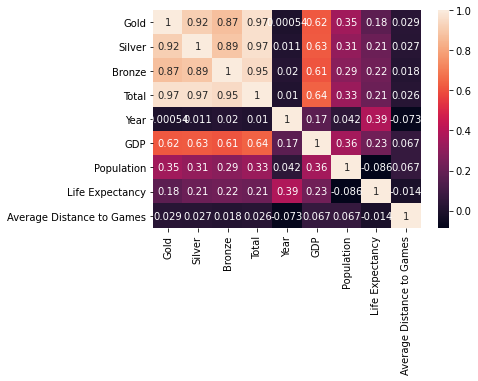

In [51]:
# create correlation matrix from the regression df
corrMatrix_1 = regression_df.corr()
# make the correlation matrix into a heatmap - plotly
# heat_map = px.imshow(corrMatrix_1)
# heat_map.show()

# seaborn
import seaborn as sn
sn.heatmap(corrMatrix_1, annot=True)
plt.show()

In [21]:
# regression on one factor
X = scaling_drops['GDP'].values.reshape(-1,1)
y = scaling_drops['Total'].values

# reshape the data becuase we are only using one column for training and testing

# X_train = X_train.reshape(-1,1)
# X_test = X_test.reshape(-1,1)
# y_train = y_train.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# NOTE: have to remove all of the NaN values - drop na on the df
# fit the data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [23]:
# check intercept
print(regressor.intercept_)

7.591405280266768


In [24]:
# check coefficient
print(regressor.coef_)
# for every one unit change in GDP we can expect a 1% increase in medal count. Units are in billions

[0.00909451]


In [25]:
# make predictions
y_pred = regressor.predict(X_test)

In [26]:
# put predictions in dataframe
preditcions_df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
preditcions_df

,Actual,Predicted
0,1,7.688903
1,2,8.027616
2,2,10.315719
3,9,9.540485
4,18,7.935792
...,...,...
149,1,7.769542
150,1,8.153106
151,63,11.153951
152,2,8.648414


In [27]:
# evaluating the regression with stats metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 8.92713649531572
Mean Squared Error: 207.260318553179
Root Mean Squared Error: 14.396538422592391


In [ ]:
# NOTE: Analysis: look at root mean squared versus mean of all data (11.8)
# the mean in our anlysis is higher so that is bad. Looking for less than 10% of the dataset mean value. We are way over the mean...

In [29]:
# add the prediction values back to the dataframe?
# NOTE: the values from the predictions df don't look like they match the values in the df. Is that because of the training and testing datasets? Totals in preditions df are 1,2,2,9 vs training data 10,1,1,27

scaling_drops['Predictions'] = preditcions_df['Predicted']
scaling_drops.head(15)

ipykernel_launcher:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country,Country Code,Gold,Silver,Bronze,Total,Year,Host_City,Host_Country,GDP,...,Distance From Atlanta 1996,Distance From Sydney 2000,Distance From Athens 2004,Distance From Beijing 2008,Distance From London 2012,Distance From Rio de Janeiro 2016,Distance From Tokyo 2020,Population,Life Expectancy,Predictions
0,Netherlands,NLD,2,4,4,10,1964,Tokyo,JPN,18.699381,...,5020.216004,9971.222180,1445.327934,6159.095349,257.703275,5802.288098,7464.868875,12127120.0,73.704146,7.688903
2,Pakistan,PAK,0,1,0,1,1964,Tokyo,JPN,5.204956,...,8598.987912,6303.435514,2725.646840,2391.214242,4181.826383,7442.963227,3637.034033,49627623.0,48.670000,10.315719
3,Brazil,BRA,0,0,1,1,1964,Tokyo,JPN,21.211892,...,3947.154167,10926.308280,5332.087331,9713.367679,5290.562660,566.330518,10813.306870,81064572.0,56.121000,9.540485
4,Italy,ITA,10,10,7,27,1964,Tokyo,JPN,63.175417,...,5306.023586,9198.202937,668.293462,5675.147349,955.548316,5380.124554,6965.601489,51675350.0,70.311707,7.935792
5,Sweden,SWE,2,2,4,8,1964,Tokyo,JPN,22.532417,...,5861.369457,9701.364560,1520.955875,5528.906607,1125.672413,6577.588157,6835.886355,7661354.0,73.733171,16.857343
6,Uruguay,URY,0,0,1,1,1964,Tokyo,JPN,1.975702,...,4955.930116,11319.755470,6603.845289,10706.041010,6668.340597,1067.104609,11734.265130,2665383.0,68.455000,7.863354
7,Ireland,IRL,0,0,1,1,1964,Tokyo,JPN,2.766609,...,4477.958742,10484.383730,1943.408303,6746.474883,356.684014,5627.794110,8052.048537,2866550.0,70.401293,7.981809
8,Japan,JPN,16,5,8,29,1964,Tokyo,JPN,81.749006,...,12233.308860,4840.279356,6345.328465,1307.919095,7703.968961,10769.552880,0.000000,96903000.0,70.132439,8.505130
9,Iran,IRN,0,0,2,2,1964,Tokyo,JPN,5.379846,...,7409.591644,7254.599739,1527.219054,3554.869761,3011.220363,6543.354447,4823.938424,24307855.0,47.172000,8.238275
11,Switzerland,CHE,1,2,1,4,1964,Tokyo,JPN,14.480557,...,5082.748138,9621.005369,1079.457978,5966.725534,519.048464,5529.126736,7266.357867,5789228.0,72.077805,7.796540


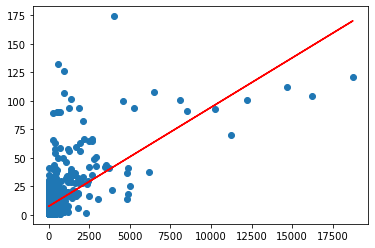

In [52]:
# regression without splitting the data just fitting on x and y
X = scaling_drops['GDP'].values.reshape(-1,1)
y = scaling_drops['Total'].values

# initialize regression
model = LinearRegression()

# fit data
model.fit(X,y)

# get predictions
y_pred = model.predict(X)

# plot the data
plt.scatter(X,y)
plt.plot(X, y_pred, color='red')
plt.show()

# print coefficient and intercept

In [ ]:
# create regression function 

def single_regression(df, dependent, independent):
    ''' df = dataframe object 
        dependent = df column
        independent = df column
        returns scikit learn regression and stats '''
    # use only rows where dependent variable data exit
    reg_df = df[df[dependent].notna()]

    # reshape the data if only using single column for regression
    X = reg_df[dependent].value.reshape(-1,1)
    y = reg_df[independent].values

    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [144]:
analysis_years = [1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004,
       2008, 2012, 2016]

analysis_years = [str(x) for x in analysis_years]
analysis_years

['1964',
 '1968',
 '1972',
 '1976',
 '1980',
 '1984',
 '1988',
 '1992',
 '1996',
 '2000',
 '2004',
 '2008',
 '2012',
 '2016']

In [163]:
# reviewing the dataset to see if we can get more data to add
# try to scrape the competitor table
# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

# go to page to pull table
url = "https://www.olympedia.org/editions"
browser.visit(url)

# parse HTML
html = browser.html
html_soup = soup(html, 'html.parser')

analysis_years = [
'1964',
 '1968',
 '1972',
 '1976',
 '1980',
 '1984',
 '1988',
 '1992',
 '1996',
 '2000',
 '2004',
 '2008',
 '2012',
 '2016']

test_years = ['1964', '2000']

# click the year that we want
# for year in test_years:
browser.find_by_text("1964").click()

# get page url
page_url = browser.url

# reset soup
# parse HTML
html = browser.html
html_soup = soup(html, 'html.parser')

# click the participants link
# if browser.is_element_present_by_xpath('/html/body/div[2]/table[1]/tbody/tr[8]/td/a[1]', wait_time=10) == True:
browser.find_by_xpath('html/body/div[2]/table[1]/tbody/tr[8]/td/a[1]').click()

# browser.back()
# browser.back()




====== WebDriver manager ======
Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
Driver [C:\Users\tgrah\.wdm\drivers\chromedriver\win32\92.0.4515.107\chromedriver.exe] found in cache


In [ ]:
# define function to flatten list of lists
def flatten_list(a_list):
    flat_list = []
    for element in a_list:
        if type(element) is list:
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

In [171]:
# target url
page_url_temp = "https://www.olympedia.org/counts/edition"


In [201]:
editions = [16,17,18,19,20,21,22,23,24,25,26,53,54,59]

In [202]:
# list urls to visit
editions_list = [f"{page_url_temp}/{x}" for x in editions]

In [176]:
import time

In [206]:
# looks like this is going to work
# test_urls
# test_urls = editions_list

# start browser
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

# initialize dictionary to hold data for year year
comp_by_year = {}

# initialize counter for years
year_counter = 0

# start loop to get the data
for url in editions_list:
# for year in analysis_years:
    # click the year that we want
    # browser.find_by_text(year).click()

    browser.visit(url)

    # get page url
    page_url = browser.url

    # reset soup
    # parse HTML
    html = browser.html
    html_soup = soup(html, 'html.parser')

    # set the year with a counter
    year = analysis_years[year_counter]
    # set table on the year page to the value of that year in a dictionary
    # should only be one table on the page to scrape
    comp_by_year[year] = pd.read_html(page_url)[0]

    # reset header
    comp_by_year[year].columns = comp_by_year[year].iloc[0] 
    # take every row after the first row
    comp_by_year[year] = comp_by_year[year][1:]
    # reset the index
    comp_by_year[year].reset_index(inplace=True, drop=True)

# dont know if I need this yet
    # # reset header
    # competitors_table.columns = competitors_table.iloc[0] 
    # # take every row after the first row
    # competitors_table = competitors_table[1:]
    # # reset the index
    # competitors_table.reset_index(inplace=True, drop=True)

    # create list of columns to pull with iloc
    comp_cols = [0]

    # get the number of columns
    total_cols = len(comp_by_year[year].columns)
    # we wat the last 3 columns so subtract 3
    pull_cols = total_cols-3
    # add those columns to list for competition data
    comp_cols.append(list(range(pull_cols,total_cols)))
    # flatten the list
    comp_cols = flatten_list(comp_cols)
    # use list to pull the data we want from the df
    comp_by_year[year] = comp_by_year[year].iloc[:, comp_cols]

    # drop the first row
    comp_by_year[year].drop(index=0, inplace=True)

    # rename the columns
    comp_by_year[year].columns = ['Country Code', 'Male', 'Female', 'Total']

    # append column with the year
    comp_by_year[year]['Year'] = year

    # increment counter
    year_counter += 1
    # wait before going to the next page
    # time.sleep(5)

browser.quit()




====== WebDriver manager ======
Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
Driver [C:\Users\tgrah\.wdm\drivers\chromedriver\win32\92.0.4515.107\chromedriver.exe] found in cache


In [207]:
# check length of dictionary
len(comp_by_year) # should be 14

14

In [208]:
# combine the data
all_competitors_df = pd.concat(comp_by_year.values(), ignore_index=True)
print(all_competitors_df.shape)
print(all_competitors_df.Year.unique().tolist())
all_competitors_df.head()

(2208, 5)
['1964', '1968', '1972', '1976', '1980', '1984', '1988', '1992', '1996', '2000', '2004', '2008', '2012', '2016']


,Country Code,Male,Female,Total,Year
0,AFG,8,-,8,1964
1,AHO,4,-,4,1964
2,ALG,1,-,1,1964
3,ARG,96,6,102,1964
4,AUS,203,40,243,1964


In [212]:
# spot checking
all_competitors_df[(all_competitors_df['Country Code'] == 'AUS') & (all_competitors_df['Year'] == '1980')]

,Country Code,Male,Female,Total,Year
430,AUS,92,28,120,1980


In [216]:
all_competitors_df.replace('-',0, inplace=True)
all_competitors_df.head()

,Country Code,Male,Female,Total,Year
0,AFG,8,0,8,1964
1,AHO,4,0,4,1964
2,ALG,1,0,1,1964
3,ARG,96,6,102,1964
4,AUS,203,40,243,1964


In [220]:
# create dataframe by indexing any row with a null value
missing_data_df = all_competitors_df[all_competitors_df.isnull().any(axis=1)]
missing_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 93 to 2207
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  0 non-null      object
 1   Male          28 non-null     object
 2   Female        28 non-null     object
 3   Total         28 non-null     object
 4   Year          28 non-null     object
dtypes: object(5)
memory usage: 1.3+ KB


In [223]:
all_competitors_df = all_competitors_df[all_competitors_df['Country Code'].notna()]

In [225]:
all_competitors_df.to_csv("08-07-21_All Country Competitors.csv", index=False)

In [226]:
all_competitors_df.shape

(2180, 5)

In [227]:
comp_medals = pd.read_csv("Competition_Cleaned - copy for matching.csv")
comp_medals.head()


,Country,Country Code,Pos.,Year,Discipline,Event,Gender,ISO Codes,ISO Country Names
0,Argentina,ARG,2,1964,Equestrian Eventing,Individual,Open,ABW,Aruba
1,Australia,AUS,1,1964,Swimming,"1,500 metres Freestyle",Men,AFG,Afghanistan
2,Australia,AUS,3,1964,Swimming,"1,500 metres Freestyle",Men,AGO,Angola
3,Australia,AUS,3,1964,Athletics,"10,000 metres",Men,AIA,Anguilla
4,Australia,AUS,1,1964,Swimming,100 metres Freestyle,Women,ALA,Aland Islands


In [228]:
code_to_map = pd.read_clipboard()
code_to_map.head()

,Current_code,Replace_code
0,AHO,ANT
1,ALG,DZA
2,BAH,BHS
3,BAR,BRB
4,BER,BMU


In [230]:
# create dictionary of the codes to replace
replacement_dict = code_to_map.set_index('Current_code').to_dict()['Replace_code']

In [232]:
# map the codes to reaplce and keep everything that doesn't match
comp_medals['Country Code'].map(replacement_dict).fillna(comp_medals['Country Code'], inplace=True)

In [233]:
comp_medals.to_clipboard()